### Introducción a la Investigación Operativa y la Optimización

### • Clase 3  - Gradientes Conjugados

**Nazareno Faillace Mullen - Departamento de Matemática, FCEN, UBA**

# Gradientes Conjugados

__Definición:__ sea $A\in\mathbb{R}^{n\times n}$ definida positiva, diremos que los vectores $d^0, d^1,\dots, d^{n-1}\in\mathbb{R}^n-\{0\}$ son A-conjugados si:
$$ (d^i)^TAd^j = 0$$

__Lema:__ sea $A\in\mathbb{R}^{n\times n}$ definida positiva, cualquier conjunto de vectores A-conjugados es linealmente independiente.

Sea $f\colon \mathbb{R}^n \rightarrow \mathbb{R}$ dada por:
$$\frac{1}{2}x^TAx + bx^T +c$$
con $A\in\mathbb{R}^{n\times n}$ definida positiva, $b\in\mathbb{R}^n$, $c\in \mathbb{R}$. 

Sea $\{d^0, \dots, d^k\}$ un conjunto de vectores A-conjugados cualquiera, la idea consiste en tomar:
$$x_{k+1} = x_{k} + t_kd_k \quad \text{donde} \quad t_k = \underset{t\in\mathbb{R}}{\mathrm{argmin}}\{f(x_k + td_k)\}$$
Notar que, como no sabemos si los $d_k$ son direcciones de descenso, no pedimos que $t_k$ sea necesariamente positivo. Nuevamente, definimos $\varphi(t) = f(x_k + t d_k)$ y, como $f$ es cuadrática, podemos hallar el $t$ óptimo:
$$t_k = - \dfrac{\nabla f(x_k)^T d_k}{(d_k)^TAd_k}= -\dfrac{(Ax_k +b)^T d_k}{(d_k)^TAd_k}$$

__Teorema:__ Sea $f\colon \mathbb{R}^n \rightarrow \mathbb{R}$ dada por $\frac{1}{2}x^TAx + bx^T +c$ con $A\in\mathbb{R}^{n\times n}$ definida positiva, $b\in\mathbb{R}^n$, $c\in \mathbb{R}$, entonces dado $x_0\in\mathbb{R}^n$, la secuencia definida anteriormente alcanza el minimizador $x^\ast$ en $n$ pasos (i.e. $x_n = x^\ast$).


__Lema:__ sea $x_0\in \mathbb{R}^n$, la secuencia definida anteriormente cumple que:
$$ \nabla f(x_k)^Td_j = 0 \quad \forall j=0,1,\dots,k-1 $$
### Gradientes conjugados

La idea consiste en que las direcciones conjugadas $\{d_0, \dots, d_k\}$ sean definidas a partir del gradiente de $f$. Sea $x_0\in\mathbb{R}^n$, se define $d_0 = -\nabla f(x_0)$ y, para $k=0,1,\dots,n-2$ se define:
$$d_{k+1} = -\nabla f(x_{k+1}) + \beta_kd_k$$
donde $\beta_k$ es calculado de manera tal que $d_k$ y $d_{k+1}$ sean A-conjugados:
$$\beta_k = \dfrac{(d_k)^T A \nabla f(x_{k+1})}{(d_k)^TAd_k}$$

__Obs:__ $d_k$ son direcciones de descenso:
$$\nabla f(x_k)^T d_k = \nabla f(x_k)^T (-\nabla f(x_k)+\beta_{k-1}d_{k-1}) = -\lVert \nabla f(x_k) \rVert ^2 $$

### Algoritmo de Gradientes Conjugados (para cuadráticas)

Dados: $A\in\mathbb{R}^{n\times n}$ definida positiva, $b,\; x_0 \in \mathbb{R}^n, \; \varepsilon > 0, \; k_{MAX} > 0$ <br>
$d_0 = -(Ax_0 + b)$ <br>
$k = 0$ <br>
REPETIR mientras $\lVert Ax_k + b \rVert > \varepsilon$ y $k<k_{MAX}$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; $t_k = - \dfrac{(Ax_k+b)^T d_k}{(d_k)^TAd_k}$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; $x_{k+1} = x_k + t_kd_k$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; $\beta_k = \dfrac{(d_k)^T A (Ax_{k+1} + b)}{(d_k)^TAd_k}$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; $d_{k+1} = -(Ax_{k+1} + b) + \beta_kd_k$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; $k = k+1$ <br>
DEVOLVER $x_k$

In [1]:
def metodo_gradienteConjugadoCuadraticas(A, b, x0, epsilon=0.001, maxiter=10000): 
  precision = epsilon
  iter = 0
  x = x0
  xs = [x]
  d = -(A@x0+b)
  ds = [d]
  while(np.linalg.norm(A@x+b)>precision and iter<maxiter):
      t = -((A@x+b).T@d) / (d.T@A@d)
      x = x+t*d
      bk = (d.T@A@(A@x+b)) / (d.T@A@d)
      d = -(A@x+b) + bk*d
      
      iter = iter + 1
      xs.append(x)
      ds.append(d)
  if(iter==maxiter):
    print("ALCANZO MAX ITERACION!")
  return xs[len(xs)-1] , iter, xs

## Ejercicios

1. Implementar Gradientes Conjugados para funciones cuadráticas. Debe tomar como input la matriz $A$, el vector $b$, el vector inicial $x_0$ y la cantidad máxima de iteraciones $k_{MAX}$. Se puede tomar $\varepsilon = 10^{-8}$.
2. Comparar el desempeño (en término de cantidad de iteraciones) de Gradiente Conjugado con el del Método del Gradiente para las funciones cuadráticas dadas por $f(x)=\frac{1}{2}x^T A_i x$ para cada una de las $A_i$ que figuran debajo. ¿Qué se observa? Analizar los autovalores de cada $A_i$ utilizando la función `np.linalg.eigvals`. Probar utilizando como $x_0$:
    - el vector de 1's (`np.ones`)
    - con vectores aleatorios con valores en [0,1]x[0,1] (`np.random.rand(n)` donde `n` es la dimensión del vector) (utilizar el mismo punto de partida para ambos métodos)
3. ¿Por qué el método de Gradientes Conjugados para $A_6$ termina antes de $6$ iteraciones?  
4. Modificar ambos métodos para que también devuelvan la secuencia $\{x_k\}_k$. Para $A_4$ y $A_5$, utilizar las funciones `a_forma_cuadratica` y `graficar_recorrido` definidas más abajo para comparar el recorrido realizado por cada método. [Ver el ejemplo de cómo utilizar dichas funciones]. Como punto inicial para ambos experimentos, **utilizar $x_0 = (-0.15, 1)$**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

A1 = np.array([[8, 3, 3, 6, 5, 4, 4, 3, 6, 3],
             [3, 4, 2, 2, 2, 1, 3, 3, 3, 2],
             [3, 2, 5, 2, 1, 2, 4, 2, 4, 1],
             [6, 2, 2, 6, 3, 2, 4, 2, 4, 2],
             [5, 2, 1, 3, 5, 4, 1, 2, 4, 3],
             [4, 1, 2, 2, 4, 5, 1, 2, 5, 2],
             [4, 3, 4, 4, 1, 1, 6, 2, 4, 2],
             [3, 3, 2, 2, 2, 2, 2, 4, 4, 2],
             [6, 3, 4, 4, 4, 5, 4, 4, 8, 3],
             [3, 2, 1, 2, 3, 2, 2, 2, 3, 4]])

A2 = np.array([[2, 0, 1, 0, 1],
               [0, 2, 1, 1, 1],
               [1, 1, 3, 1, 1],
               [0, 1, 1, 1, 0],
               [1, 1, 1, 0, 2]])

A3 = np.diag(np.random.randint(1, 5, 100))

A4 = np.array([[10, 0], [0, 1]])

A5 = np.array([[1, -1], [0, 0.8]])

A6 = np.array([[163., 162., 171.,  -9.,   0.,   0.],
               [162., 163., 171.,  -9.,   0.,   0.],
               [171., 171., 181.,  -9.,   0.,   0.],
               [ -9.,  -9.,  -9.,   1.,   0.,   0.],
               [  0.,   0.,   0.,   0.,   1.,   0.],
               [  0.,   0.,   0.,   0.,   0.,   1.]])


def a_forma_cuadratica(A):
    """
    Transforma la función dada por (1/2)(x^T A x) a una función dada en términos de x1 y x2 para que sea posible 
    graficar sus curvas de nivel en R2.
    A tiene que ser una matriz de 2x2
    """
    def forma_cuadratica(x):
        return 0.5*(A[0,0]*(x[0]**2) + (A[0,1]+A[1,0])*x[0]*x[1] + A[1,1]*(x[1]**2))
    return forma_cuadratica

%matplotlib notebook
def graficar_recorrido(f, limites, recorrido=None, levels=10):
    """ 
    Función que grafica curvas de nivel y, opcionalmente, el recorrido de un método.
    f : es la función a graficar (tiene que ir de R2 en R)
    limites : es una lista o tupla de números: [a,b,c,d]. Va a graficar la función en el cuadrado [a,b] x [c,d]
    recorrido : acepta una lista de arrays bidimensionales para graficar el recorrido de un método
    levels : cantidad de curvas de nivel a graficar
    """
    plt.figure()
    x = np.linspace(limites[0], limites[1], 1000)
    y = np.linspace(limites[2], limites[3], 1000)
    X, Y = np.meshgrid(x, y)
    Z = f((X, Y))
    plt.contour(X,Y,Z, cmap='plasma', levels=levels)
    if recorrido is not None:
        print(recorrido)
        x_coords = [x[0] for x in recorrido]
        y_coords = [x[1] for x in recorrido]
        plt.plot(x_coords, y_coords, marker='o', lw=2, ms=8)
    plt.tight_layout()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [3]:
metodo_gradienteConjugadoCuadraticas(A4, np.zeros(2), 2*np.ones(2), 0.01, 100)

(array([-5.20417043e-17,  2.22044605e-16]),
 2,
 [array([2., 2.]),
  array([-0.01798202,  1.7982018 ]),
  array([-5.20417043e-17,  2.22044605e-16])])

<IPython.core.display.Javascript object>


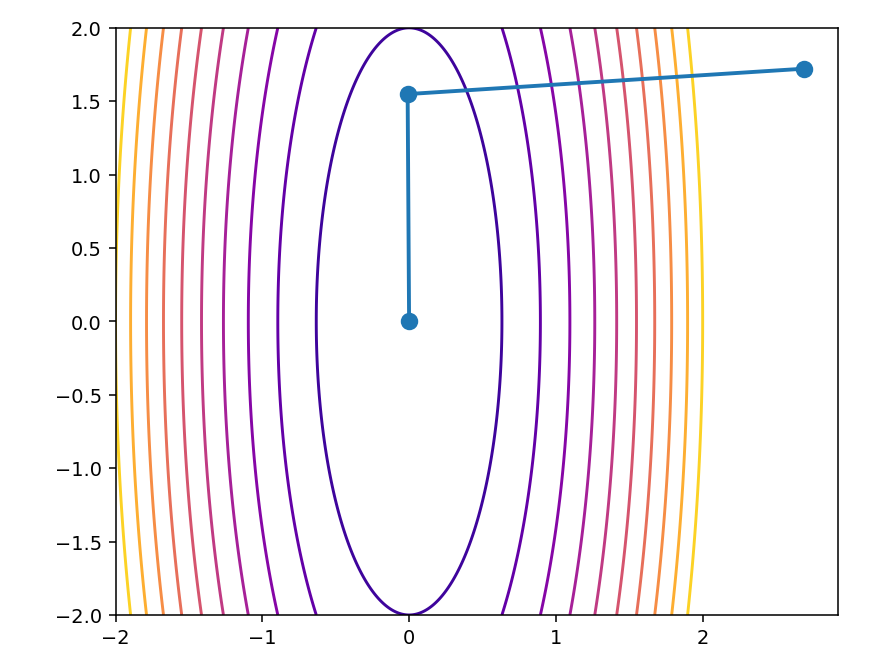

[array([2.68748283, 1.72148185]), array([-0.00992027,  1.54869821]), array([ 1.73472348e-16, -2.22044605e-16])]


In [4]:
# EJEMPLO PARA GRAFICAR EL RECORRIDO EN EL EJERCICIO 3
x_opt, iteraciones, recorrido = metodo_gradienteConjugadoCuadraticas(A4, np.zeros(2), 3*np.random.rand(2), 0.01, 100)
f = a_forma_cuadratica(A4)
graficar_recorrido(f, [-2,2, -2, 2], recorrido)

In [5]:
x_opt, iteraciones, recorrido = metodo_gradienteConjugadoCuadraticas(A1, np.zeros(10), 2*np.ones(10), 0.01, 100)
print(iteraciones)

8


In [6]:
x_opt, iteraciones, recorrido = metodo_gradienteConjugadoCuadraticas(A3, np.zeros(100), 2*np.ones(100), 0.01, 100)
print(iteraciones)

4


<IPython.core.display.Javascript object>


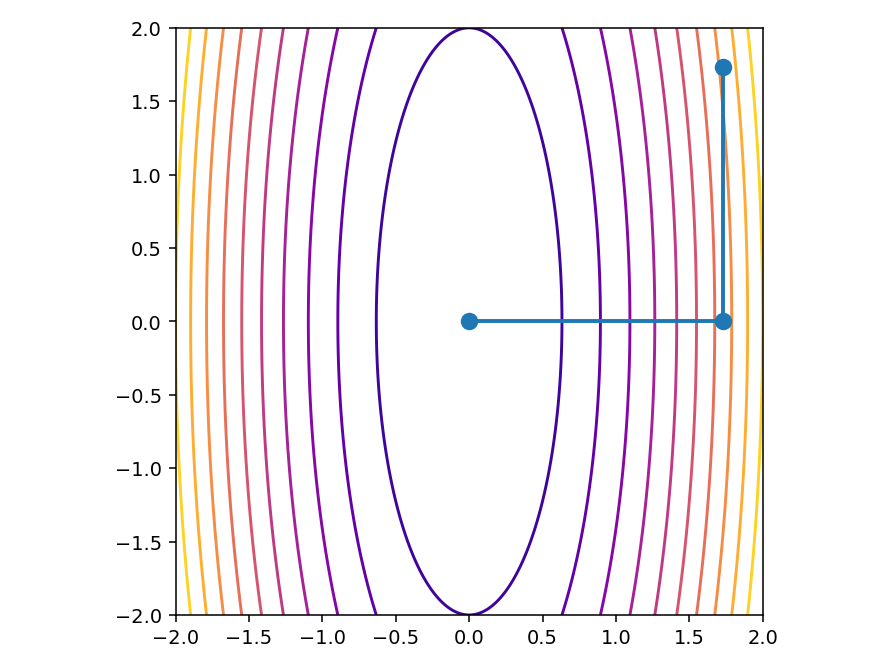

[array([1.73, 1.73]), array([ 1.73000000e+00, -2.22044605e-16]), array([-2.22044605e-16, -2.22044605e-16])]


In [7]:
x_opt, iteraciones, recorrido = metodo_gradienteConjugadoCuadraticas(A5, np.zeros(2), 1.73*np.ones(2), 0.01, 100)
f = a_forma_cuadratica(A4)
graficar_recorrido(f, [-2,2, -2, 2], recorrido)

### Extensión para funciones no cuadráticas

Se deben encontrar otras maneras de obtener la longitud del paso $t_k$ y el coeficiente $\beta_k$

__Obs:__ si $t_k$ minimiza $\varphi$ entonces las $d^k$ son direcciones de descenso. Sin embargo, la búsqueda de Armijo no alcanza para asegurar tal propiedad.

$$t_k \rightarrow \color{green}{\text{Wolfe o Sección Áurea}}$$

utilizando en Wolfe $0<c_1<c_2<\frac{1}{2}$.

Para definir el coeficiente $\beta_k$ se puede utilizar la fórmula de Fletcher y Reeves:

$$\beta^{FR}_k = \dfrac{\nabla f(x_{k+1})^T \nabla f(x_{k+1})}{\nabla f(x_{k})^T \nabla f(x_{k})} $$

o la de Polak-Ribiere:

$$\beta^{PR}_k = \dfrac{(\nabla f(x_{k+1}) - \nabla f(x_{k}))^T\nabla f(x^{k+1})}{\nabla f(x_{k})^T \nabla f(x_{k})}$$

Para el caso de funciones cuadráticas, se puede demostrar que $\beta_k = \beta^{FR}_k = \beta^{PR}_k$

Gradientes Conjugados para funciones no cuadráticas no necesariamente terminan en $n$ pasos. Una práctica que da buenos resultados es reiniciar el $\beta_k$ cada $n$ iteraciones.

In [8]:
def derivadaEn1Punto1coordenada(f,Xs, x, h=0.01):
  extra = np.zeros(len(Xs))
  extra[x]=1
  return((f(Xs+extra*h)-f(Xs-extra*h))/(2*h))

In [9]:
def gradiente(f,Xs, h=0.01):
  df = np.zeros(len(Xs))
  for i in range(0, len(Xs)):
    df[i]= derivadaEn1Punto1coordenada(f,Xs, i, h)
  return(df)

In [10]:
def metodo_gradienteGenerico(f, x0, epsilon=0.001, maxiter=10000, n=0.4, beta=5): 
  precision = epsilon
  iter = 0
  x = x0
  xs = [x]
  
  grad = gradiente(f, x, epsilon)
  ds = [-1*grad]
  while(np.linalg.norm(grad)>precision and iter<maxiter):
      d = -1*grad
      t = busquedaArmijo(f, x, d, n, beta )
      x = x+t*d
      grad = gradiente(f, x, epsilon)
      iter = iter + 1
      xs.append(x)
      ds.append(-1*grad)
  if(iter==maxiter):
    print("ALCANZO MAX ITERACION!")
  return xs, ds , iter

### Búsqueda Exacta - Sección Áurea

__Cómo aproximar un minimizador de una función con Sección Áurea__

Supongamos que sabemos que un minimizador se encuentra en $[a,b]$.
* Considerar $a<u<v<b$
* Si $\varphi(u) < \varphi(v)$, entonces el intervalo $[v,b]$ no puede contener un minimizador y es descartado
* Si $\varphi(u) \geq \varphi(v)$, entonces el intervalo $[a,u]$ puede ser descartado
* Particionar el intervalo resultante y repetir el proceso.

El método de la sección áurea consiste en tomar:
$$u = a + \frac{3-\sqrt{5}}{2}(b-a) \qquad v = a + \dfrac{\sqrt{5}-1}{2}(b-a)$$

El algoritmo de la sección áurea consiste en 2 fases: en la primera, se busca un intervalo $[a,b]$ que contenga un minimizador de $\varphi$ ; en la segunda, se reduce el intervalo $[a,b]$ hasta que la precisión deseada $\varepsilon$ es alcanzada.

__Algoritmo de sección áurea__

Dados: $f, \; x\in\mathbb{R}^n,\; d\in\mathbb{R}^n,\; \varepsilon > 0,\; \rho>0$<br>
Definir $\theta_1 = \frac{3-\sqrt{5}}{2}$, $\theta_2 = 1 - \theta_1$ <br>
Definir $a = 0$, $s = \rho$, $b=2\rho$ <br>
Definir $\varphi_b = f(x+b*d), \; \varphi_s = f(x+s*d)$ <br>
REPETIR mientras $\varphi_b<\varphi_s$: <br>
&nbsp;&nbsp;&nbsp;&nbsp; $a=s$, $s=b$, $b=2b$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; $\varphi_s = \varphi_b, \; \varphi_b = f(x+b*d)$ <br>
Definir $u = a+\theta_1(b-a), \; v=a+\theta_2(b-a)$ <br>
Definir $\varphi_u = f(x+u*d), \; \varphi_v = f(x+v*d)$ <br>
REPETIR mientras $(b-a)>\varepsilon$: <br>
&nbsp;&nbsp;&nbsp;&nbsp; Si $\varphi_u<\varphi_v$: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $b=v, \; v=u,\; u=a+\theta_1(b-a)$ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\varphi_v = \varphi_u,\; \varphi_u = f(x+u*d)$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; Si no: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $a=u,\; u=v,\; v= a+\theta_2(b-a)$ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\varphi_u = \varphi_v,\; \varphi_v = f(x+v*d)$ <br>
Devolver $t = \dfrac{u+v}{2}$

Valores usuales para los parámetros: $\varepsilon = 10^{-5},\; \rho=1$ <br>
**Obs.:** utilizar `np.sqrt(n)` para calcular la raíz cuadrada de `n`.

In [11]:
import math

In [24]:
def seccionAurea(f, x, d, epsilon, p ):
    theta1 = (3- math.sqrt(5))/2
    theta2 = 1 - theta1
    a = 0
    s = p
    b = 2*p
    phiB = f(x+ b*d)
    phiS = f(x+ s*d)
    while(phiB<phiS):
        a = s
        s = b
        b = 2*b
        phiS = phiB
        phiB = f(x + b * d)
    u = a + theta1 * (b-a)
    v = a + theta2 * (b-a)
    phiU = f(x + u*d)
    phiV = f(x + v*d)
    while((b-a)>epsilon):
        if(phiU<phiV):
            b = v
            v = u
            u = a + theta1*(b-a)
            phiV = phiU
            phiU = f(x + u * d)
        else:
            a = u
            u = v
            v = a + theta2*(b-a)
            phiU = phiV
            phiV = f(x + v * d)
    return((u+v)/2)
            

### Algoritmo de Gradientes Conjugados

Dados: $f,\; x_0 \in \mathbb{R}^n, \; \varepsilon > 0, \; k_{MAX} > 0$ <br>
$d_0 = -\nabla f(x_0)$ <br>
$k = 0$ <br>
REPETIR mientras $\lVert \nabla f(x_k) \rVert > \varepsilon$ y $k<k_{MAX}$<br>
&nbsp;&nbsp;&nbsp;&nbsp; Calcular $t_k$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; Hacer $x_{k+1} = x_k + t_kd_k$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; Si $k + 1 \neq 0 \mod(n)$: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Calcular $\beta_k$ (utilizando la fórmula de Fletcher y Reeves o la de Polak-Ribiere) <br>
&nbsp;&nbsp;&nbsp;&nbsp; Si no: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\beta_k = 0$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; Definir $d_{k+1} = -\nabla f(x_{k+1}) + \beta_kd_k$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; $k=k+1$ <br>
DEVOLVER $x_{k}$ <br>

**Obs.:** para calcular módulo, utilizar `%`. Ejemplo: `x % 4` devuelve $x$ módulo 4

In [46]:
def metodo_gradienteConjugadoGenerico(f, x0, epsilon=0.01, maxiter=10000): 
  precision = epsilon
  iter = 0
  x = x0
  xs = [x]
  grad = gradiente(f, x, 10**-5)
  d = -1*grad
  ds = [-1*grad]
  while(np.linalg.norm(grad)>precision and iter<maxiter):
      
      t = seccionAurea(f, x, d, 10**-5, 1)
      x = x+t*d
      if((iter+1) % len(x0) != 0):
        xant = xs[-1]
        bk = (gradiente(f,x).T @ gradiente(f,x)) / (gradiente(f,xant).T @ gradiente(f,xant))
      else:
        bk = 0
      d = -1* gradiente(f, x) + bk * d
      grad = gradiente(f, x, epsilon)
      iter = iter + 1
      xs.append(x)
      ds.append(d)
  if(iter==maxiter):
    print("ALCANZO MAX ITERACION!")
  return xs[-1] , iter, xs

## Ejercicios 

1. Implementar el método de Gradientes Conjugados para funciones en general. Para encontrar la longitud del paso, utilizar las condiciones de Wolfe o Sección Áurea.
2. Aplicar a la función de Rosenbrock en 2 dimensiones y a $f(x_1,x_2)= 2(e^{(-x_1^2-x_2^2)} - e^{(-(x_1-1)^2-(x_2-1)^2)})$. Comparar con el desempeño del Método del Gradiente.

In [41]:
def rosenbrock(x):
    """
    minimiser : x = (1,..., 1)
    """
    d = np.shape(x)[0]
    return sum(100*(x[i+1]-x[i]**2)**2+(x[i]-1)**2 for i in range(d-1))

def resta_exponenciales(x):
    s1 = np.exp(-x[0] ** 2 - x[1] ** 2)
    s2 = np.exp(-(x[0] - 1) ** 2 - (x[1] - 1) ** 2)
    return (s1 - s2) * 2

In [42]:
eps = 0.05

In [45]:
metodo_gradienteConjugadoGenerico(rosenbrock, np.array([0.0,0.0]), eps)

[-2.  0.]
ALCANZO MAX ITERACION!


(array([0.99088791, 0.98190192]),
 10000,
 [array([0., 0.]),
  array([0.16125902, 0.        ]),
  array([0.29291061, 0.05065022]),
  array([-2.86652491,  8.22927467]),
  array([-2.86747002,  8.22962759]),
  array([-2.86779655,  8.22859551]),
  array([-2.7117283 ,  7.29036772]),
  array([2.86595787, 8.21685425]),
  array([2.86506043, 8.21452342]),
  array([2.86553591, 8.21433325]),
  array([2.86409056, 8.20994267]),
  array([2.86472592, 8.20972765]),
  array([2.8633533 , 8.20561531]),
  array([2.86396996, 8.20540354]),
  array([2.86234712, 8.20028181]),
  array([2.86303965, 8.20005676]),
  array([2.8619933 , 8.19720806]),
  array([2.86251438, 8.19700991]),
  array([2.86148346, 8.1942332 ]),
  array([2.86199412, 8.19403686]),
  array([2.86085962, 8.19086959]),
  array([2.86140794, 8.19066666]),
  array([2.86053485, 8.18846845]),
  array([2.86098389, 8.18828287]),
  array([2.85860915, 8.17999367]),
  array([2.85947969, 8.17973928]),
  array([2.85760293, 8.17356066]),
  array([2.85836851, 